In this notebook, we will go over the well-known Titanic dataset. We will start with some metrics about the data, follow that to create some informed visualizations, and lastly try to apply some algorithms with scikit-learn to test predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titan = pd.read_csv('train.csv')#, index_col='PassengerId')
titan.info
titan['Sex_bool'] = pd.get_dummies(titan.Sex, prefix='Sex_bool', drop_first=True)
titan2 = titan.drop(['Name', 'Cabin', 'Sex'], axis=1)
titan2 = titan2.dropna(axis=0, how='any')

We can probably gain some insight by doing a little group_by analysis with the help of pandas.

In [3]:
print titan2.groupby(['Sex_bool', 'Pclass']).mean()
print titan2.groupby(['Sex_bool', 'Survived']).mean()

                 PassengerId  Survived        Age     SibSp     Parch  \
Sex_bool Pclass                                                         
0        1        479.060241  0.963855  34.240964  0.554217  0.506024   
         2        442.905405  0.918919  28.722973  0.500000  0.621622   
         3        406.500000  0.460784  21.750000  0.823529  0.950980   
1        1        451.910891  0.396040  41.281386  0.376238  0.336634   
         2        450.333333  0.151515  30.740707  0.373737  0.242424   
         3        455.217391  0.150198  26.507589  0.490119  0.256917   

                       Fare  
Sex_bool Pclass              
0        1       108.619680  
         2        21.951070  
         3        15.875369  
1        1        71.142781  
         2        21.113131  
         3        12.162695  
                   PassengerId    Pclass        Age     SibSp     Parch  \
Sex_bool Survived                                                         
0        0          424.2

A good way to visually represent information and compare it in a grouped format is via the violin plot. This is a standard part of the seaborn library, which we've already imported.

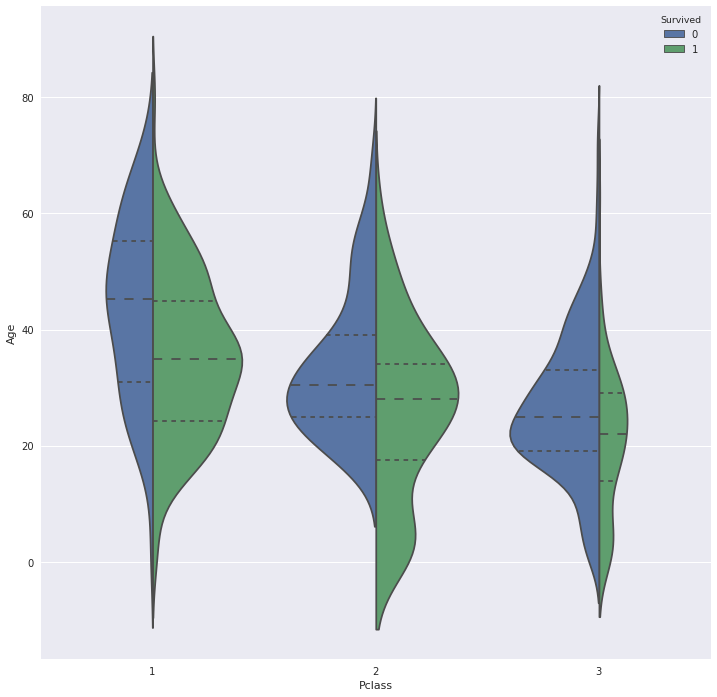

In [4]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(12,12))
sns.violinplot(x=titan.Pclass, y=titan.Age, hue=titan.Survived, split=True, inner='quart', scale='count')

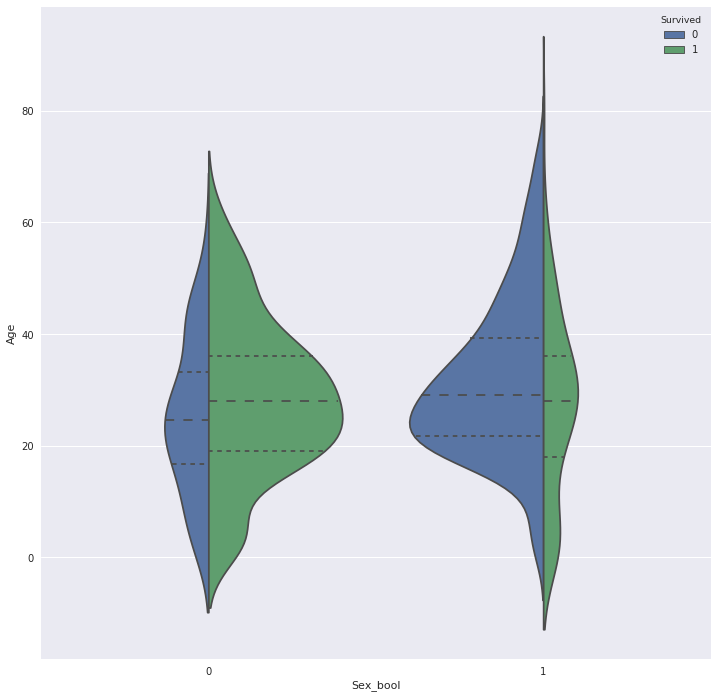

In [5]:
fig, ax = plt.subplots(figsize=(12,12))
sns.violinplot(x=titan2.Sex_bool, y=titan2.Age, hue=titan2.Survived, inner='quart', scale='count', split=True)

In [6]:
a1, a2 = titan.loc[pd.isnull(titan.Age)].Survived.value_counts()
b1, b2 = titan.Survived.value_counts()
print "The ratio of survivors in the NaN age group is {} versus {} for the entire dataset.".format(float(a2) / (a1 + a2), float(b2) / (b1 + b2))

The ratio of survivors in the NaN age group is 0.293785310734 versus 0.383838383838 for the entire dataset.


This is curious, as the survival rate of those not documented by age seems significantly lower than the others.

In the next section, we will try a couple of algorithms to see how they handle prediction.

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [8]:
X_train, X_test, y_train, y_test = train_test_split(titan2.drop(['Embarked', 'Ticket', 'Survived'], axis=1), titan2.Survived, test_size=0.2, random_state=42)

In [9]:
logreg = LogisticRegression(penalty='l1')
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.80419580419580416

For some reason, the l1 penalty performed slightly better on the data and broke the 80 percent mark.

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.62937062937062938

The nearest neighbors did not perform to well here.

In [11]:
params = [{'n_neighbors' : range(1,11), 'weights': ['uniform', 'distance']}]
gridsearch = GridSearchCV(knn, params)
gridsearch.fit(X_train, y_train)
gridsearch.score(X_test, y_test)

0.60839160839160844

I have the feeling this has not been coded properly. I will return to this at a later time.